# Inteligenta Artificiala
# Laboratorul 2
# Metoda celor mai apropiati vecini

### Imports

In [46]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import math
from tqdm.notebook import tqdm

### Download and unzip data

In [49]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
!unzip data_MNIST.zip -d ./

--2022-02-28 20:48:07--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip.1’

data_MNIST.zip.1    100%[===================>] 614.89K  --.-KB/s    in 0.03s   

2022-02-28 20:48:07 (22.1 MB/s) - ‘data_MNIST.zip.1’ saved [629644/629644]

Archive:  data_MNIST.zip
replace ./data/test_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/test_images.txt  
replace ./data/test_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/test_labels.txt  
replace ./data/train_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/train_images.txt  
replace ./data/train_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load data

In [50]:
train_images = np.loadtxt('./data/train_images.txt')
train_labels = np.int32(np.loadtxt('./data/train_labels.txt'))

test_images = np.loadtxt('./data/test_images.txt')
test_labels = np.int32(np.loadtxt('./data/test_labels.txt'))


# Execises

### Crearea clasei

In [103]:
class KnnClasifier:
    def __init__(self, train_images, train_labels): 
        self.train_images = train_images 
        self.train_labels = train_labels
        
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
      # calculez distantele
        if metric.lower() == 'l2':
            distances = np.sqrt(np.sum(((self.train_images - test_image) ** 2),axis=1))
        elif metric.lower() == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis=1)
        else:
            raise Exception("Metric not implemented")
        
        # sortam distantele - dar avem nevoie doar de indicii acelor pozitii
        sorted_idx = distances.argsort()

        # pastram doar primii k vecini
        sorted_idx = sorted_idx[:num_neighbors]

        # extragem label-urile acelor k vecini
        voting_labels = self.train_labels[sorted_idx]
        
        return np.bincount(voting_labels).argmax()
    
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        predicted_labels = [self.classify_image(image, num_neighbors, metric) for image in test_images]
        return np.array(predicted_labels)

In [87]:
def accuracy_score(labels, predicted_labels):
    return np.mean(labels == predicted_labels)

In [105]:
model = KnnClasifier(train_images, train_labels)

In [90]:
predictions = model.classify_images(test_images, num_neighbors=3, metric="l2")

In [93]:
acc = accuracy_score(test_labels, predictions)
with open("predictii_3nn_l2_mnist.txt", "w") as f:
  f.write(f"Accuracy is {acc}\n")


In [114]:
acc2 = []
for x in range(1, 10, 2):
  predicted_labels = model.classify_images(test_images, num_neighbors=x, metric="l2")
  acc2.append(accuracy_score(test_labels, predicted_labels))
acc2

[0.884, 0.898, 0.896, 0.88, 0.88]

In [115]:
acc1 = []
for x in range(1, 10, 2):
  predicted_labels = model.classify_images(test_images, num_neighbors=x, metric="l1")
  acc1.append(accuracy_score(test_labels, predicted_labels))
acc1

[0.88, 0.884, 0.868, 0.864, 0.864]

In [117]:
with open("acuratete_l2.txt", "w") as f:
  for x in acc2:
    f.write(f"{x} ")
  f.write("\n")
  for x in acc1:
    f.write(f"{x} ")

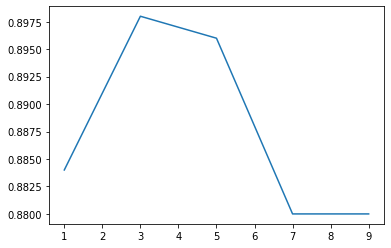

In [96]:
plt.plot([1,3,5,7,9], acc2)
plt.show()

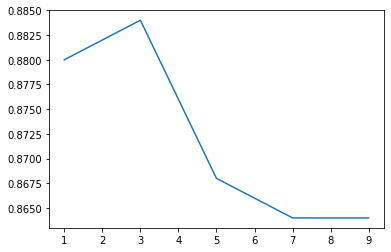

In [118]:
plt.plot([1,3,5,7,9], acc1)
plt.show()